<a href="https://colab.research.google.com/github/AishaniD078/huds_ms_airband_analysis_2_repo/blob/main/MS_AR_Analysis_Trina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '/content/bdc_us_provider_summary_by_geography_D24_10jun2025.csv'
data = pd.read_csv(file_path)

<ipython-input-10-4274484856>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [11]:
data.shape

(514217, 7)

In [17]:
data

,geography_type,geography_id,geography_desc,data_type,provider_id,res_st_pct,bus_iv_pct
0,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130077,0.0000,0.1291
1,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130228,0.5622,0.5622
2,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130403,0.1278,0.1475
3,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130405,0.0042,0.0042
4,CBSA (MSA),10100,"Aberdeen, SD Micro Area",Fixed Broadband,130627,1.0000,1.0000
...,...,...,...,...,...,...,...
514212,Tribal,9975R,Wassamasaw SDTSA,Fixed Broadband,430076,1.0000,1.0000
514213,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,130077,1.0000,0.8616
514214,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,130403,1.0000,0.4068
514215,Tribal,9975R,Wassamasaw SDTSA,Mobile Broadband,131425,1.0000,0.7514


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514217 entries, 0 to 514216
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   geography_type  514217 non-null  object 
 1   geography_id    514217 non-null  object 
 2   geography_desc  514217 non-null  object 
 3   data_type       514217 non-null  object 
 4   provider_id     514217 non-null  int64  
 5   res_st_pct      514217 non-null  float64
 6   bus_iv_pct      514217 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ MB


In [13]:
data.isnull().sum()

,0
geography_type,0
geography_id,0
geography_desc,0
data_type,0
provider_id,0
res_st_pct,0
bus_iv_pct,0


In [14]:
correlation = data[['res_st_pct', 'bus_iv_pct']].corr()


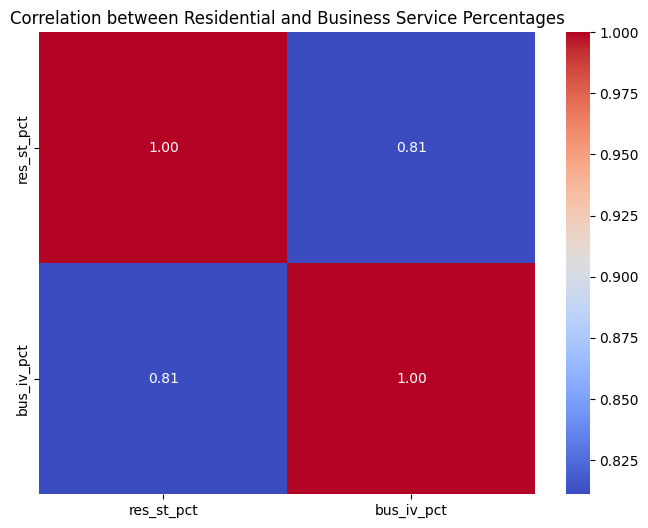

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation between Residential and Business Service Percentages")
plt.show()


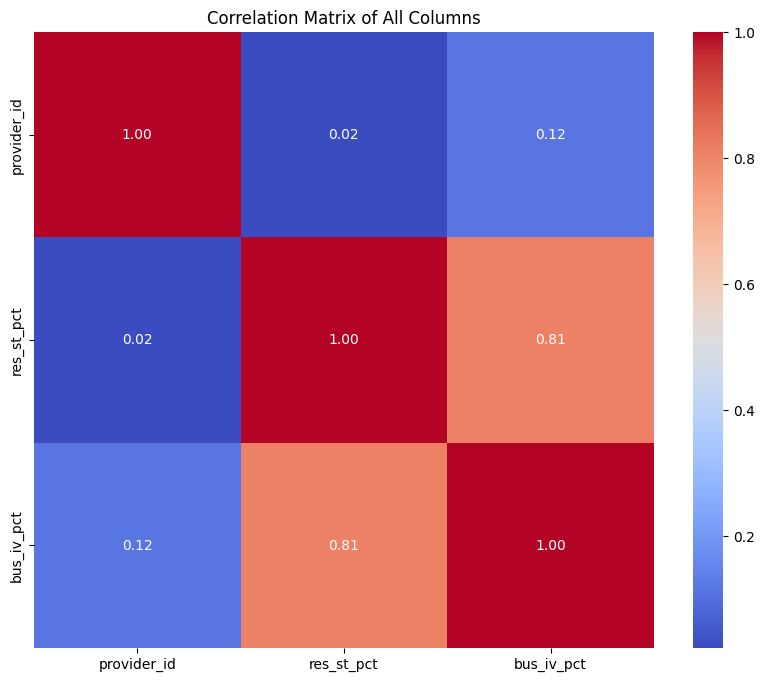

In [16]:
# Calculate the correlation between all columns
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of All Columns")
plt.show()

In [19]:
# Select relevant columns
analysis_df = data[['geography_type', 'data_type', 'res_st_pct', 'bus_iv_pct']]


In [20]:
geo_grouped = analysis_df.groupby('geography_type').mean(numeric_only=True).reset_index()


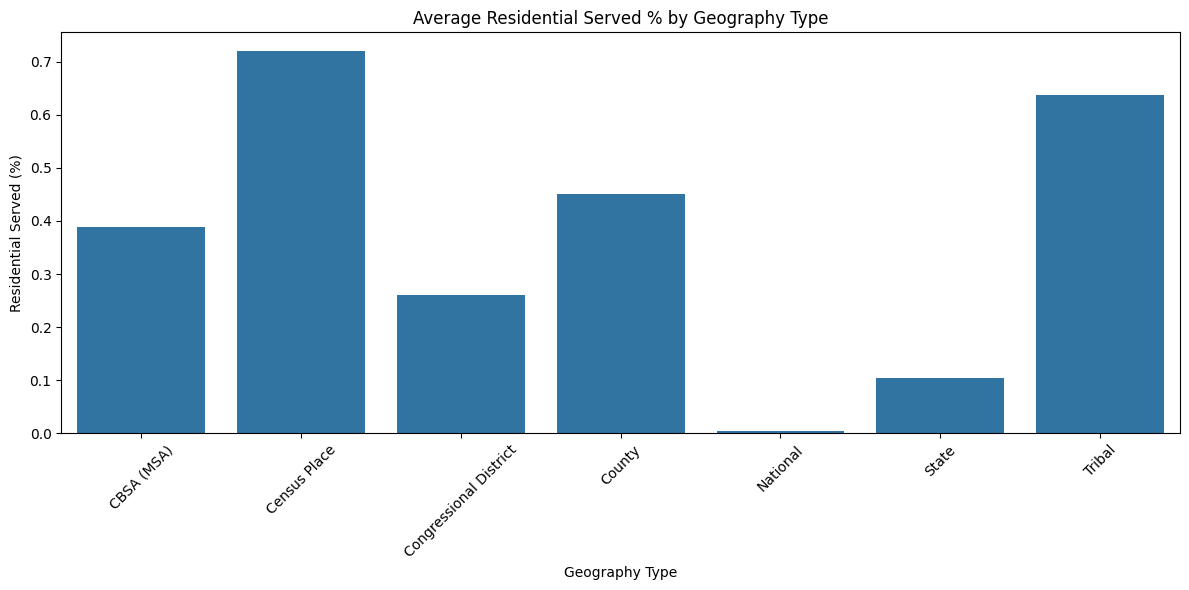

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_grouped, x='geography_type', y='res_st_pct')
plt.xticks(rotation=45)
plt.title('Average Residential Served % by Geography Type')
plt.xlabel('Geography Type')
plt.ylabel('Residential Served (%)')
plt.tight_layout()
plt.show()

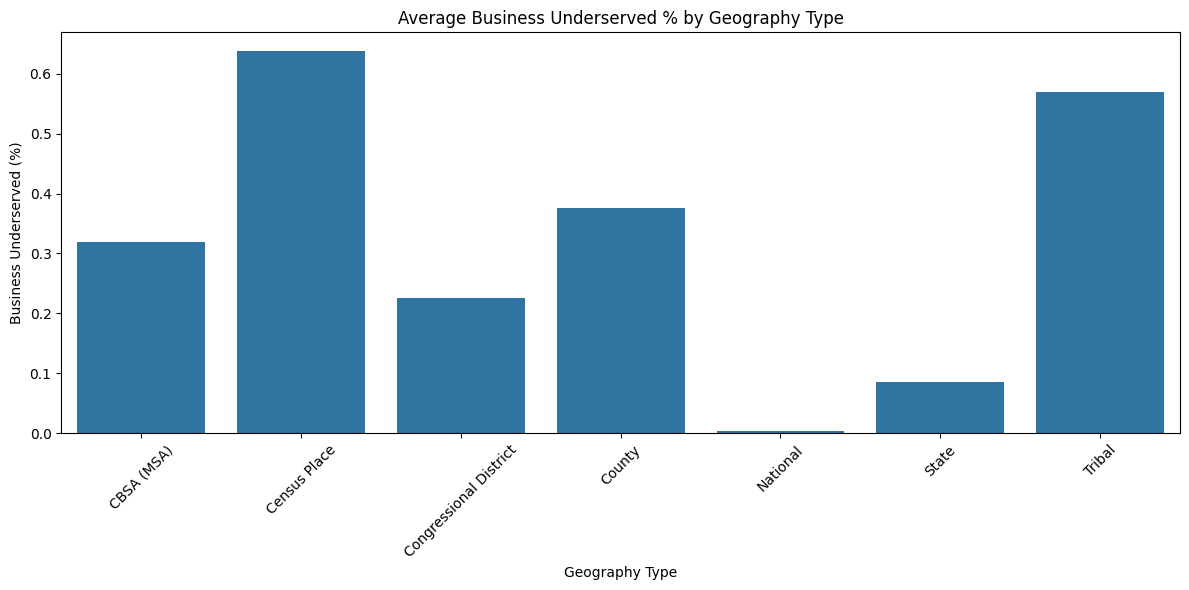

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_grouped, x='geography_type', y='bus_iv_pct')
plt.xticks(rotation=45)
plt.title('Average Business Underserved % by Geography Type')
plt.xlabel('Geography Type')
plt.ylabel('Business Underserved (%)')
plt.tight_layout()
plt.show()

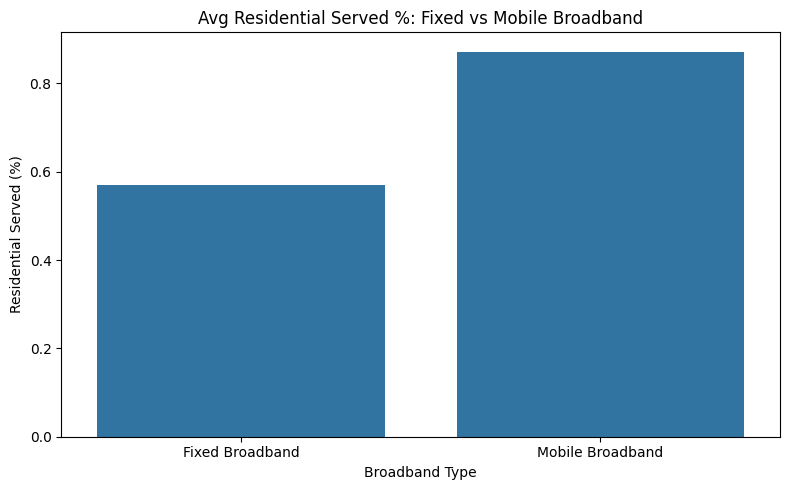

In [24]:
# Group by data_type (Fixed vs Mobile)
fixed_vs_mobile = analysis_df.groupby('data_type').mean(numeric_only=True).reset_index()

# Bar plot: Fixed vs Mobile Broadband - Residential Service
plt.figure(figsize=(8, 5))
sns.barplot(data=fixed_vs_mobile, x='data_type', y='res_st_pct')
plt.title('Avg Residential Served %: Fixed vs Mobile Broadband')
plt.ylabel('Residential Served (%)')
plt.xlabel('Broadband Type')
plt.tight_layout()
plt.show()


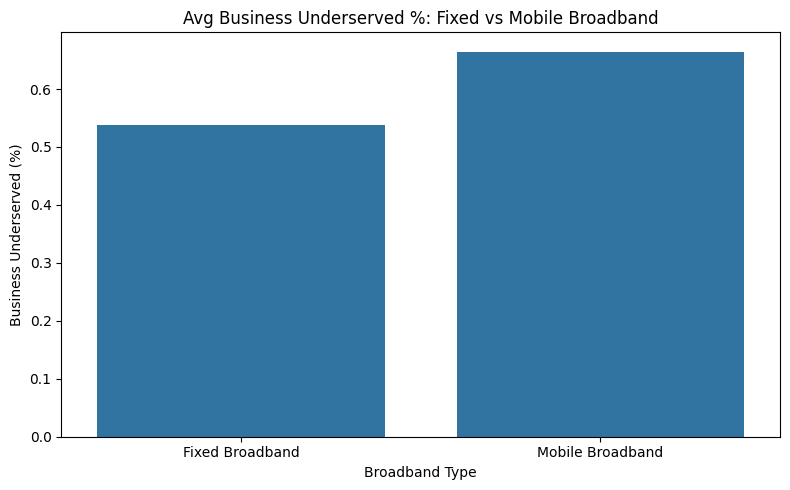

In [25]:

# Bar plot: Fixed vs Mobile Broadband - Business Underserved
plt.figure(figsize=(8, 5))
sns.barplot(data=fixed_vs_mobile, x='data_type', y='bus_iv_pct')
plt.title('Avg Business Underserved %: Fixed vs Mobile Broadband')
plt.ylabel('Business Underserved (%)')
plt.xlabel('Broadband Type')
plt.tight_layout()
plt.show()


#Research Question 1:
How does broadband coverage differ between residential and business environments across various geography types (e.g., Tribal vs. State)?

#Problem Statement:
Broadband service levels may differ between residential and business environments across different geography types. Understanding these differences is important for improving broadband access.


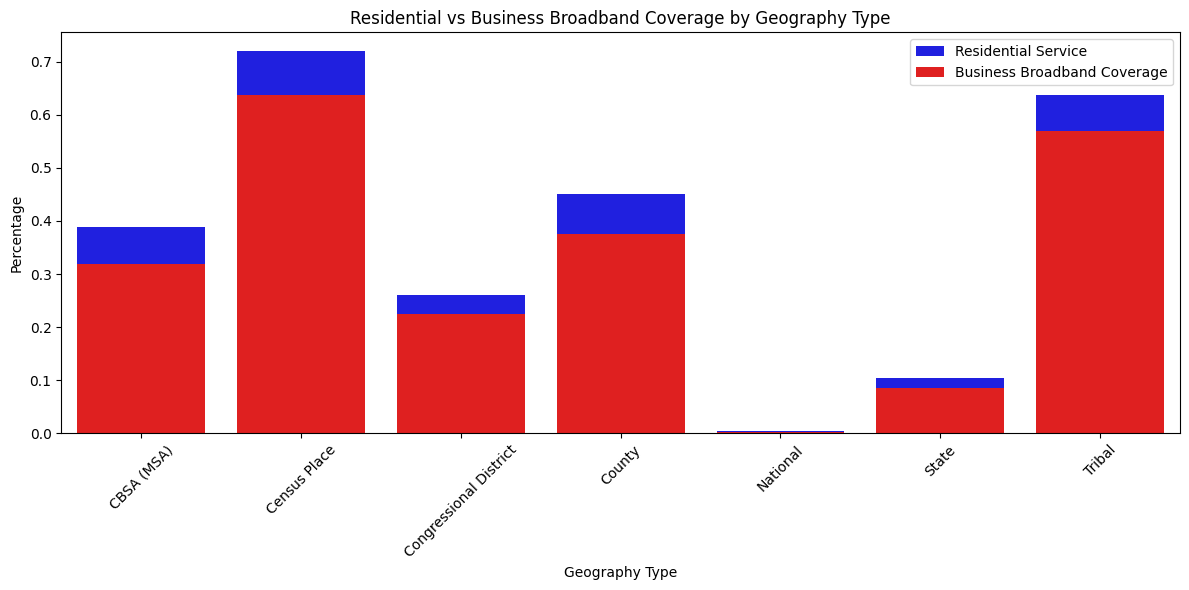

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by geography type and calculate mean residential and business broadband coverage
geo_grouped = data.groupby('geography_type')[['res_st_pct', 'bus_iv_pct']].mean().reset_index()

# Plot residential vs business broadband service by geography type
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_grouped, x='geography_type', y='res_st_pct', color='blue', label='Residential Service')
sns.barplot(data=geo_grouped, x='geography_type', y='bus_iv_pct', color='red', label='Business Broadband Coverage')
plt.xticks(rotation=45)
plt.title('Residential vs Business Broadband Coverage by Geography Type')
plt.ylabel('Percentage')
plt.xlabel('Geography Type')
plt.legend()
plt.tight_layout()
plt.show()


#Solution & Visualization:
##Insights:

The bar plot shows that urban areas (such as CBSA (MSA)) have higher residential service coverage, while rural or tribal areas show lower business broadband coverage.

In some geographies like Census Places, residential coverage is strong, but business coverage (especially for mobile broadband) is limited.

##Comparable Solution:
The difference in coverage between residential and business broadband can help policymakers target areas where businesses (especially in underserved areas) lack sufficient broadband, potentially directing resources to those regions.



#Research Question 2:
Do providers report significantly lower business coverage (bus_iv_pct) compared to residential coverage (res_st_pct) in rural or tribal areas?

#Problem Statement:
Providers may report lower business broadband coverage in rural and tribal areas compared to residential coverage. Identifying this difference can help target policy interventions.

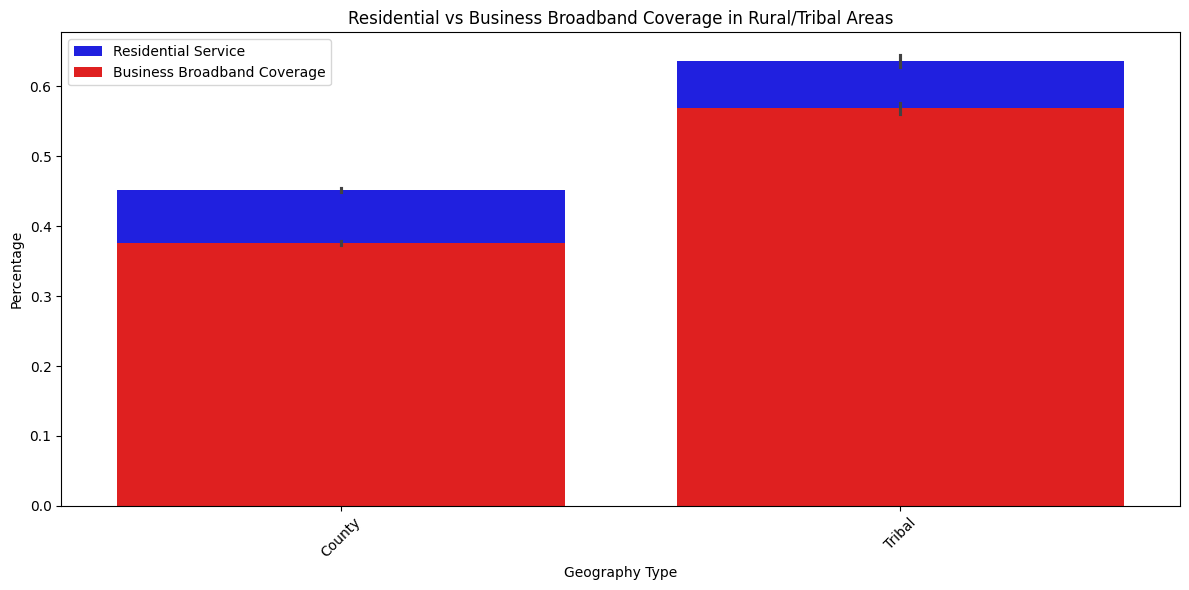

In [39]:
# Filter for rural and tribal areas
rural_tribal_areas = data[data['geography_type'].isin(['Tribal', 'County'])]

# Plot residential vs business broadband coverage in rural and tribal areas
plt.figure(figsize=(12, 6))
sns.barplot(data=rural_tribal_areas, x='geography_type', y='res_st_pct', color='blue', label='Residential Service')
sns.barplot(data=rural_tribal_areas, x='geography_type', y='bus_iv_pct', color='red', label='Business Broadband Coverage')
plt.xticks(rotation=45)
plt.title('Residential vs Business Broadband Coverage in Rural/Tribal Areas')
plt.ylabel('Percentage')
plt.xlabel('Geography Type')
plt.legend()
plt.tight_layout()
plt.show()


#Solution & Visualization:
##Insights:

The bar plot indicates that in rural and tribal areas, residential broadband coverage (blue) is higher than business broadband coverage (red), confirming that business locations are often less well-served.

This highlights the disparity between the availability of broadband for residential use versus business use in these areas.

##Comparable Solution:
In rural or tribal regions, the business broadband coverage lags behind residential coverage, signaling an opportunity for infrastructure improvements targeting business needs. This is crucial for economic development in underserved regions.

#Research Question 3:
Is mobile broadband more effective than fixed broadband in reaching underserved geographies?

#Problem Statement:
Mobile broadband may be more effective in reaching underserved areas due to its flexibility and ability to cover more areas (especially rural and remote locations). This question aims to explore the effectiveness of mobile broadband vs fixed broadband.

<ipython-input-40-918562290>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fixed_mobile_data, x='data_type', y='res_st_pct', palette='muted')


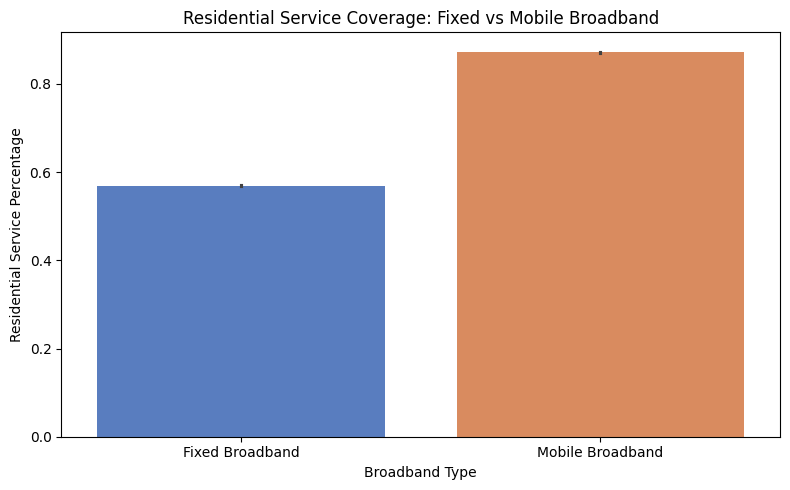

In [40]:
# Filter data for fixed vs mobile broadband
fixed_mobile_data = data[data['data_type'].isin(['Fixed Broadband', 'Mobile Broadband'])]

# Plot the comparison of residential coverage between Fixed and Mobile broadband
plt.figure(figsize=(8, 5))
sns.barplot(data=fixed_mobile_data, x='data_type', y='res_st_pct', palette='muted')
plt.title('Residential Service Coverage: Fixed vs Mobile Broadband')
plt.ylabel('Residential Service Percentage')
plt.xlabel('Broadband Type')
plt.tight_layout()
plt.show()


#Solution & Visualization:
##Insights:

The bar plot comparing mobile broadband and fixed broadband shows that mobile broadband (blue) has higher residential service coverage than fixed broadband (orange).

This suggests that mobile broadband might be more effective in covering underserved or rural areas, where fixed infrastructure is less likely to reach.

##Comparable Solution:
The higher mobile broadband coverage indicates that mobile solutions could be a key part of the strategy to increase broadband availability in areas with limited fixed broadband access.

#Research Question 4:
What is the variation in broadband service levels across different geography_type (State, County, Census Place, etc.)?

#Problem Statement:
The availability of broadband may vary significantly across different geographic levels (state, county, census place, etc.). This variation can inform targeted infrastructure investments.

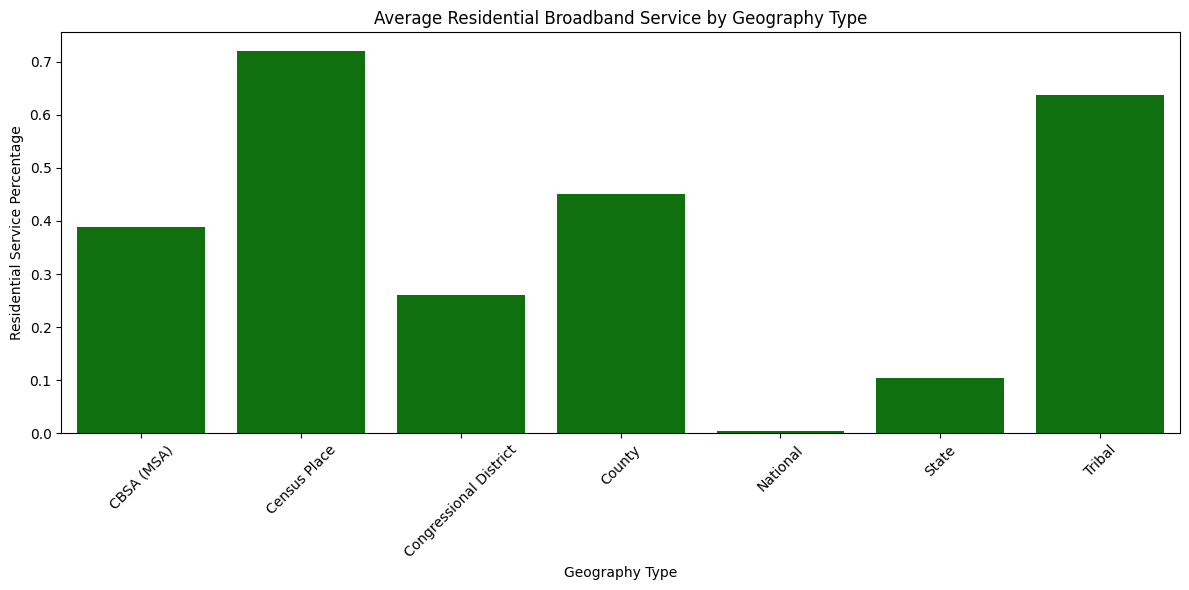

In [41]:
# Group by geography type and calculate mean residential and business broadband coverage
geo_grouped = data.groupby('geography_type')[['res_st_pct', 'bus_iv_pct']].mean().reset_index()

# Plot residential broadband service across geography types
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_grouped, x='geography_type', y='res_st_pct', color='green')
plt.xticks(rotation=45)
plt.title('Average Residential Broadband Service by Geography Type')
plt.ylabel('Residential Service Percentage')
plt.xlabel('Geography Type')
plt.tight_layout()
plt.show()




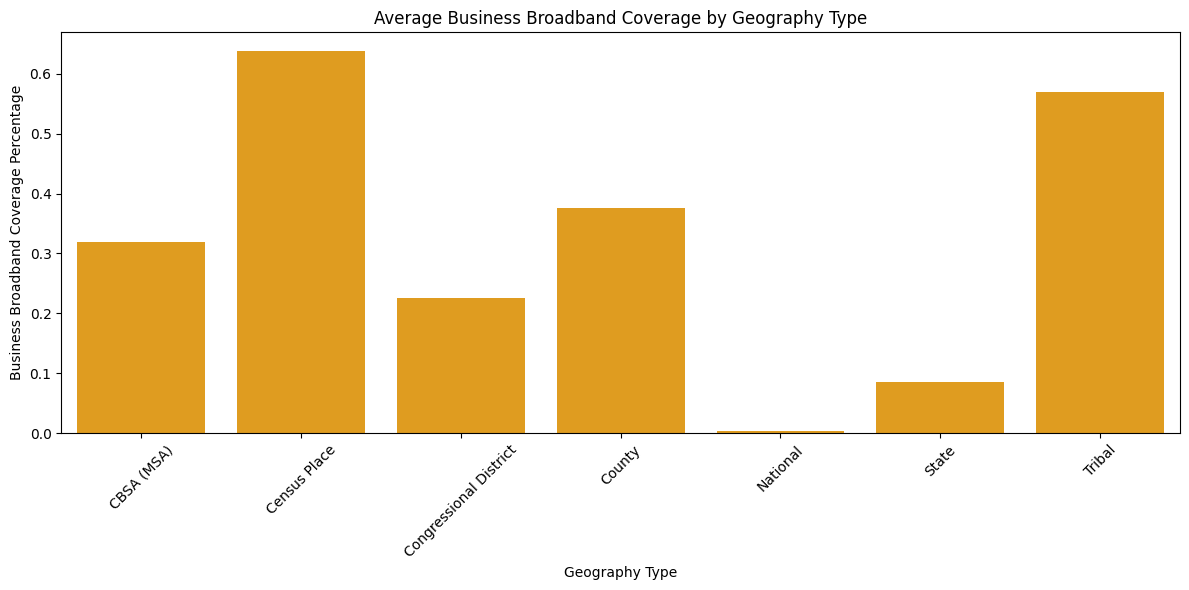

In [42]:
# Plot business broadband coverage across geography types
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_grouped, x='geography_type', y='bus_iv_pct', color='orange')
plt.xticks(rotation=45)
plt.title('Average Business Broadband Coverage by Geography Type')
plt.ylabel('Business Broadband Coverage Percentage')
plt.xlabel('Geography Type')
plt.tight_layout()
plt.show()

#Solution & Visualization:
##Insights:

The residential broadband coverage plot shows a strong presence of service in urban areas (such as Census Place and CBSA (MSA)).

The business broadband coverage plot shows that business locations are better served in metropolitan areas but still show gaps in rural and tribal regions.

##Comparable Solution:
The geography-based comparison helps identify where investments in business broadband are needed, especially in underserved areas. It also highlights where residential broadband is more readily available.



#Research Question 5:
Is there a correlation between res_st_pct and bus_iv_pct across all provider and geography combinations?

#Problem Statement:
Understanding the correlation between residential and business broadband coverage can highlight whether areas well-served residentially also have business access, or vice versa.

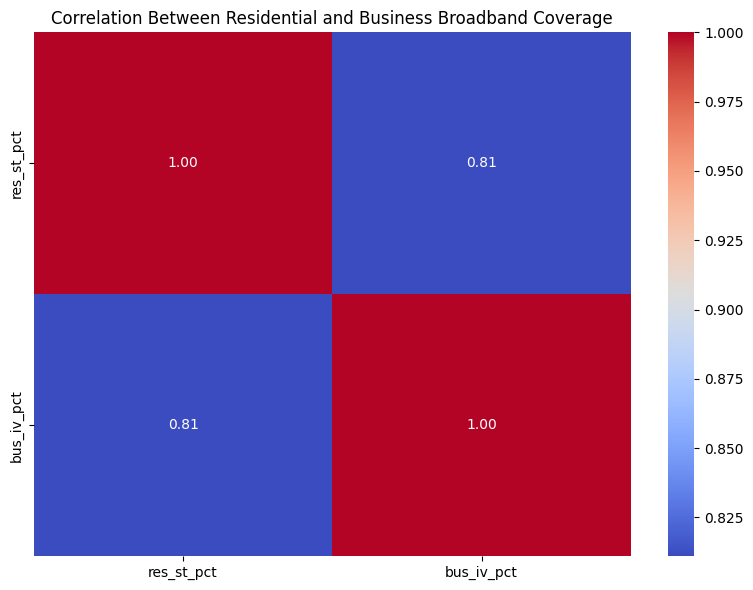

In [43]:
# Calculate the correlation between residential and business broadband coverage
correlation = data[['res_st_pct', 'bus_iv_pct']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Residential and Business Broadband Coverage')
plt.tight_layout()
plt.show()


#Solution & Visualization:
##Insights:

The heatmap reveals a strong positive correlation (0.81) between residential service and business broadband coverage. This means that areas with higher residential broadband coverage tend to have better business broadband coverage as well.

##Comparable Solution:
The strong correlation implies that regions with robust residential broadband access often benefit from higher business broadband coverage, suggesting that improvements in residential infrastructure may also help improve business broadband service.